In [20]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from waveform_utils import *
import gwsurrogate
from gw_eccentricity import measure_eccentricity
from gw_eccentricity import get_available_methods
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict


In [3]:
# This can take a few minutes
gwsurrogate.catalog.pull('NRSur7dq4')


NRSur7dq4.h5 file exits, moving to /Users/zainabmangi/opt/anaconda3/envs/waveforms/lib/python3.10/site-packages/gwsurrogate/surrogate_downloads/backup/2023Apr30_10h:21m:04s_NRSur7dq4.h5.
There are a lot of backup files in /Users/zainabmangi/opt/anaconda3/envs/waveforms/lib/python3.10/site-packages/gwsurrogate/surrogate_downloads/backup, consider removing some.


'/Users/zainabmangi/opt/anaconda3/envs/waveforms/lib/python3.10/site-packages/gwsurrogate/surrogate_downloadsNRSur7dq4.h5'

In [4]:
sur = gwsurrogate.LoadSurrogate('NRSur7dq4')

Loaded NRSur7dq4 model


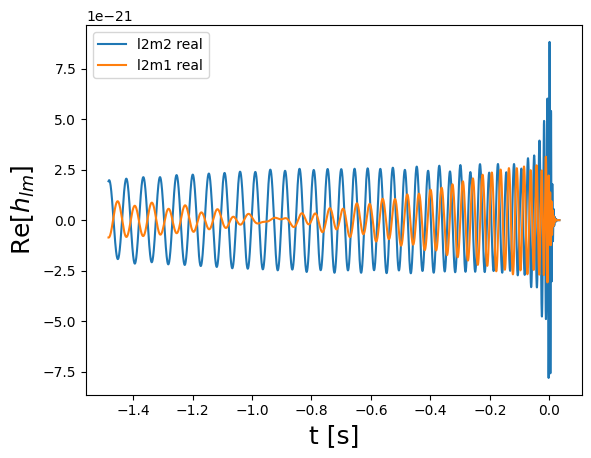

In [6]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
f_ref = 20         # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0          # initial frequency, f_low=0 returns the full surrogate
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use

# dyn stands for dynamics, do dyn.keys() to see contents
t_NRsur, hlm_NRsur, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks')

plt.plot(t_NRsur, hlm_NRsur[(2,2)].real, label='l2m2 real')
plt.plot(t_NRsur, hlm_NRsur[(2,1)].real, label='l2m1 real')
plt.ylabel('Re[$h_{lm}$]', fontsize=18)
plt.xlabel('t [s]', fontsize=18)
plt.legend()

In [9]:
#Convert hlm_NRsur into coprecessing frame

lmax = 4
#calculate coprecessing angles
alphanr, betanr, gammanr = Coprecess_Angles(4, hlm_NRsur)


[Loading lalsimutils.py : MonteCarloMarginalization version]
  scipy :  1.9.1
  numpy :  1.23.4


In [10]:
def Fully_rotated_waveform(l, m, alp, bta, gma, waveformModes ,i):
  """
  Given waveform modes in dictionary and coprecessing
  angles we can use Wigner rotatio and  rotate  waveform modes 
  at each iteraion in wigner definition we need
  rotation at each time
  so its a scalar function.
  """
  Sum = 0
  for mp in range(-l, l+1):
    Sum += wigner(l, m, mp, alp, bta, gma)*waveformModes[(l,mp)][i]
  return Sum

In [11]:
hlm_copre = {}
for l in range(2, lmax+1):
    for m in range(-l, l+1):
        hlm_copre[(l,m)] = np.zeros(len(t_NRsur), dtype=np.complex128)

for l in range(2, lmax+1):
    for m in range(-l,l+1):
        for i in range(len(t_NRsur)):
            hlm_copre[(l,m)][i] = Fully_rotated_waveform(l, m, alphanr[i], betanr[i], gammanr[i], hlm_NRsur ,i)
    

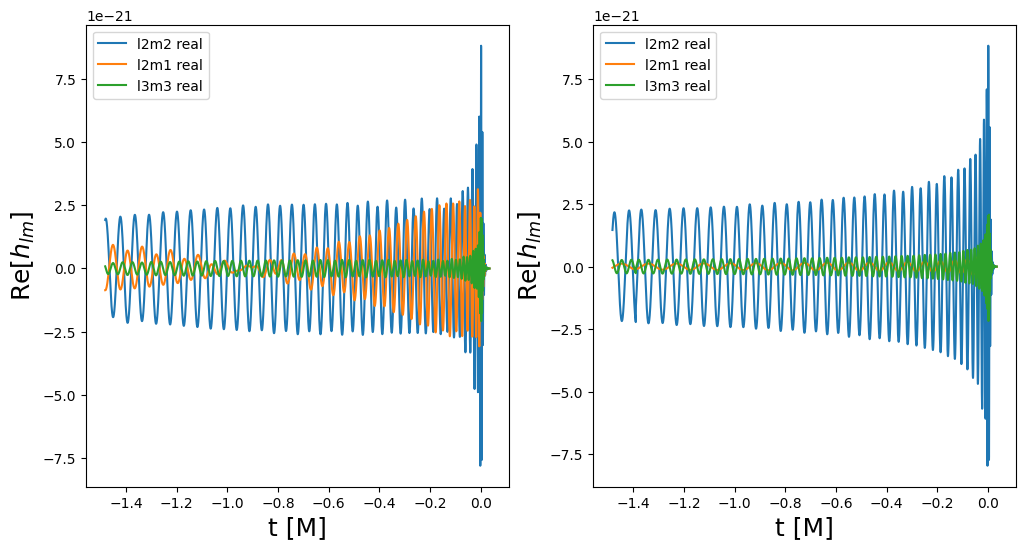

In [12]:
#plots before and after coprecessing frame

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.plot(t_NRsur, hlm_NRsur[(2,2)].real, label='l2m2 real')
ax1.plot(t_NRsur, hlm_NRsur[(2,1)].real, label='l2m1 real')
ax1.plot(t_NRsur, hlm_NRsur[(3,3)].real, label='l3m3 real')
ax1.set_ylabel('Re[$h_{lm}$]', fontsize=18)
ax1.set_xlabel('t [M]', fontsize=18)
ax1.legend()

ax2.plot(t_NRsur, hlm_copre[(2,2)].real, label='l2m2 real')
ax2.plot(t_NRsur, hlm_copre[(2,1)].real, label='l2m1 real')
ax2.plot(t_NRsur, hlm_copre[(3,3)].real, label='l3m3 real')
ax2.set_ylabel('Re[$h_{lm}$]', fontsize=18)
ax2.set_xlabel('t [M]', fontsize=18)
ax2.legend()

plt.show()

In [16]:
dataDict1 = {"t": t_NRsur,
           "hlm": {(2, 2): hlm_copre[(2,2)]}}

dataDict = {"t": t_NRsur,
           "hlm": {(2, 2): hlm_NRsur[(2,2)]}}

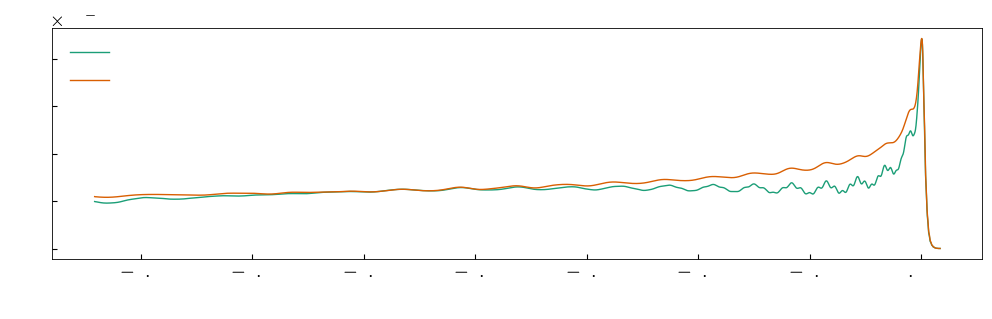

In [23]:
#%matplotlib notebook

# Plot the (2,2) mode amplitudes of the two waveforms
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="NRsur")
ax.plot(dataDict1["t"], np.abs(dataDict1["hlm"][(2, 2)]), label="NRsur in coprecessing frame")
ax.legend()
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$A_{22}$");

/Users/zainabmangi/opt/anaconda3/envs/waveforms/lib/python3.10/site-packages/gw_eccentricity/eccDefinition.py:1075: UserWarning: Encountered negative eccentricity.
For more verbose output use `debug_level=1`.
  debug_message("Encountered negative eccentricity.",


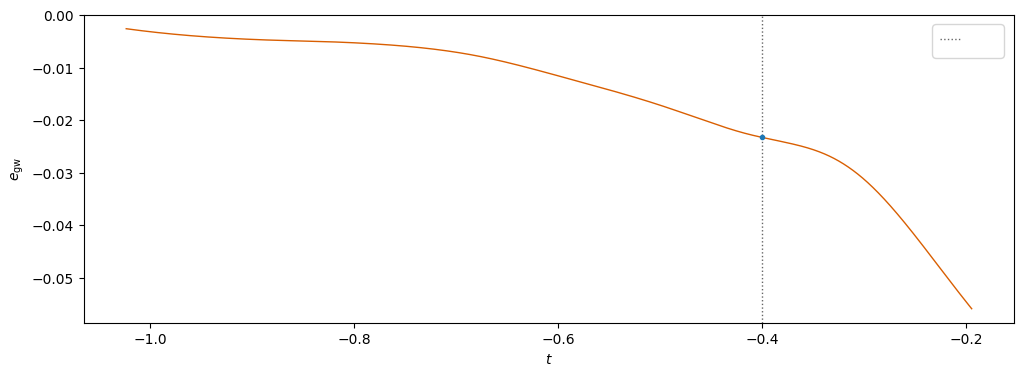

In [21]:
#plot eccentricity in coprecessing frame.

method = "Amplitude"
tref_in = -0.4

# First data
return_dict = measure_eccentricity(tref_in=tref_in,
                                  method=method,
                                  dataDict=dataDict)
gwecc_object = return_dict["gwecc_object"]


# Plot data
gwecc_object.plot_eccentricity(ax=ax1)

# Add a title to the figure
fig.suptitle("Eccentricity vs Time")

# Display the figure
plt.show()

/Users/zainabmangi/opt/anaconda3/envs/waveforms/lib/python3.10/site-packages/gw_eccentricity/eccDefinition.py:1075: UserWarning: Encountered negative eccentricity.
For more verbose output use `debug_level=1`.
  debug_message("Encountered negative eccentricity.",
/Users/zainabmangi/opt/anaconda3/envs/waveforms/lib/python3.10/site-packages/gw_eccentricity/eccDefinition.py:1318: UserWarning: egw(t) is nonmonotonic in the range [-1.3773481893125143, -0.11099076743751449]
For more verbose output use `debug_level=1`.
  debug_message(message, self.debug_level,


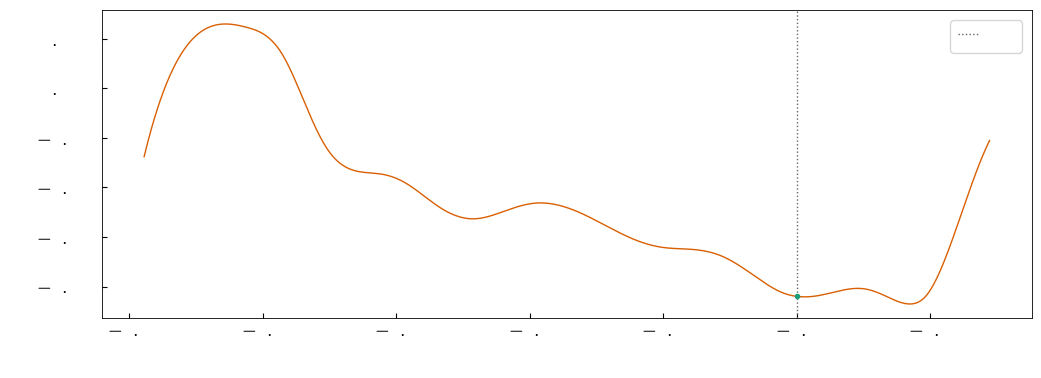

In [22]:
return_dict1 = measure_eccentricity(tref_in=tref_in,
                                  method=method,
                                  dataDict=dataDict1)
gwecc_object1 = return_dict1["gwecc_object"]

gwecc_object1.plot_eccentricity(ax=ax2)

# Add a title to the figure
fig.suptitle("Eccentricity vs Time")

# Display the figure
plt.show()